# Resultados Finales y analisis

In [1]:
%pip install regex
import pandas as pd
import numpy as np
import regex as re

import warnings
warnings.filterwarnings('ignore') 

import pylab as plt
import seaborn as sns
import matplotlib as plt

Note: you may need to restart the kernel to use updated packages.


In [2]:
sharks = pd.read_csv('sharks_clean.csv', encoding='latin1')
df = sharks.copy()
df.head()

,case number,date,year,type,country,area,location,activity,name,sex,...,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,observations1,observations2
0,2018.06.09,09-Jun-2018,2018,Unknown,USA,Hawaii,"Habush, Oahu",surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,no observations,no observations
1,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,no observations,no observations
2,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,no observations,no observations
3,2018.06.03.b,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",surfing,Chris Â,M,...,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,no observations,no observations
4,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",swimming,Jose Ernesto da Silva,M,...,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,no observations,no observations


Obejtivo:

**O1:** Indentificar los ataques de surf segun el sexo del surfista 

**O2:** Ver el numero de casos con resultado fatal por año 


In [3]:
df.activity.value_counts(normalize=True)*100

activity
surfing     37.838661
fishing     28.584475
swimming    19.939117
diving      13.637747
Name: proportion, dtype: float64

* Aqui vemos el numero de actividades que son exclusivamente surf 

In [4]:
surf_df = df[(df['activity'] == 'surfing')]
surf_df.shape


(1243, 24)

* Y aqui vemos el numero de actividades de surf segun el sexo del surfista 

In [5]:
surf_df.sex.value_counts()

sex
M          1138
F            77
unknown      28
Name: count, dtype: int64

In [11]:
surf_df.sex.value_counts(normalize=True)*100

sex
M          91.552695
F           6.194690
unknown     2.252615
Name: proportion, dtype: float64

*El resultado del analisis nos dice que el 91.5% de las muertes fueron en varones y el 6.2% fueron mujeres 

<Axes: title={'center': 'Surfing attacks by sex'}, ylabel='count'>

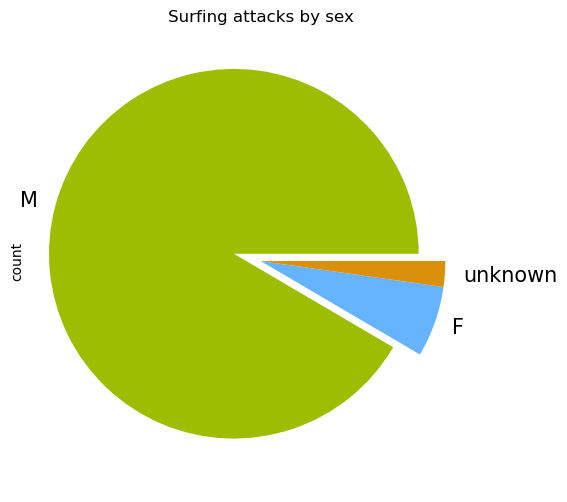

In [6]:
surf_df.sex.value_counts().plot.pie(labels=['M', 'F', 'unknown'], fontsize=15, figsize=(6, 6), colors = ('#9dbd00','#66b3ff','#db900d','#ffcc99','#009dbd'), explode=(0.15, 0, 0), title = 'Surfing attacks by sex')

In [9]:
df['fatal (y/n)'].value_counts(normalize=True)*100

fatal (y/n)
N          79.604262
Y          14.063927
UNKNOWN     6.331811
Name: proportion, dtype: float64

* Con esto vemos que de todos los ataques por tiburones, el 79.6% no fueron con perdida de vida, ya que apenas el 14.6% de los casos resultaron con resultado mortal 

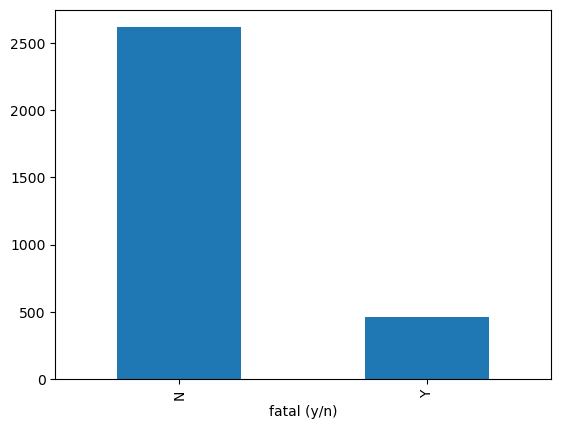

In [10]:
df['fatal (y/n)'].value_counts().head(2).plot.bar();

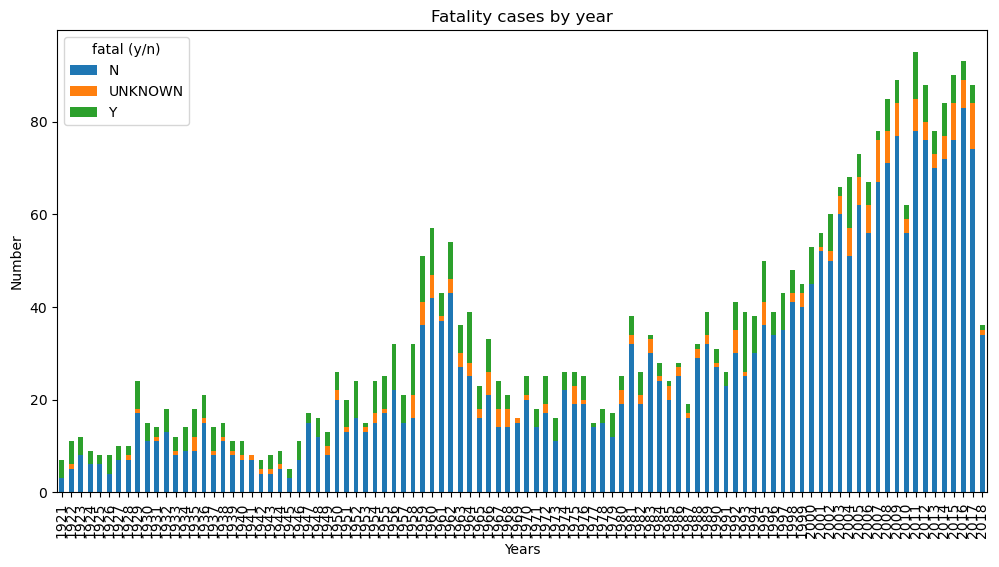

In [8]:
import matplotlib.pyplot as plt
data = df.groupby(['year', 'fatal (y/n)']).size().unstack()

# Creo un gráfico de barras
data.plot(kind='bar', stacked=True, figsize=(12, 6))

# Configuramos las etiquetas y el título
plt.xlabel('Years')
plt.ylabel('Number')
plt.title('Fatality cases by year')

# Muestra el gráfico
plt.show()

* En la grafica superior podemos ver que si bien el numero de casos de ataques de tiburon a surfistas a aumentadoo considerablemente desde los años 80 hasta ahora, probablemente por la popularidad de este deporte, no se observa un incremento notable en el número de defunciones por ataque de tiburon.